In [1]:
# mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since there have been error of font "Times New Roman", we can run it locally.

In [7]:
# Install Times New Roman
!apt-get -y install ttf-mscorefonts-installer fontconfig
# fc-cache -f -v

# Restart runtime after installing.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
ttf-mscorefonts-installer is already the newest version (3.8ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Copy dataset from google drive and unzip.
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/val
!cp /content/drive/MyDrive/IEEE_Access/dataset/train.zip /content/data/train.zip
!cp /content/drive/MyDrive/IEEE_Access/dataset/val.zip   /content/data/val.zip
!unzip /content/data/train.zip -d /content/data/train
!unzip /content/data/val.zip   -d /content/data/val

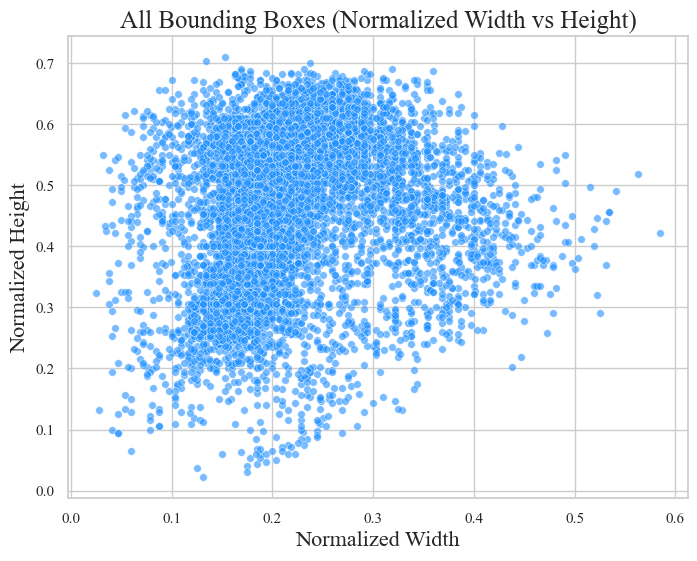


Cluster Centers for k=2:
  Cluster 0: Width=0.1962, Height=0.3271
  Cluster 1: Width=0.2246, Height=0.5387


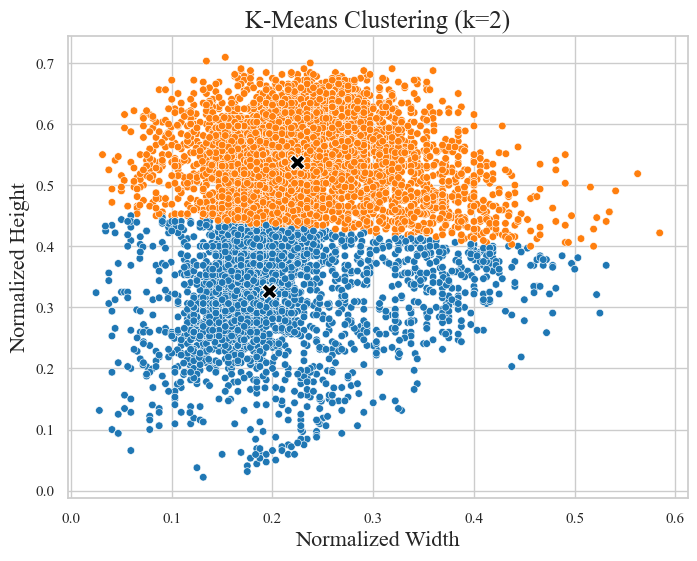


Cluster Centers for k=3:
  Cluster 0: Width=0.1767, Height=0.3239
  Cluster 1: Width=0.2116, Height=0.5441
  Cluster 2: Width=0.3596, Height=0.4399


<Figure size 640x480 with 0 Axes>

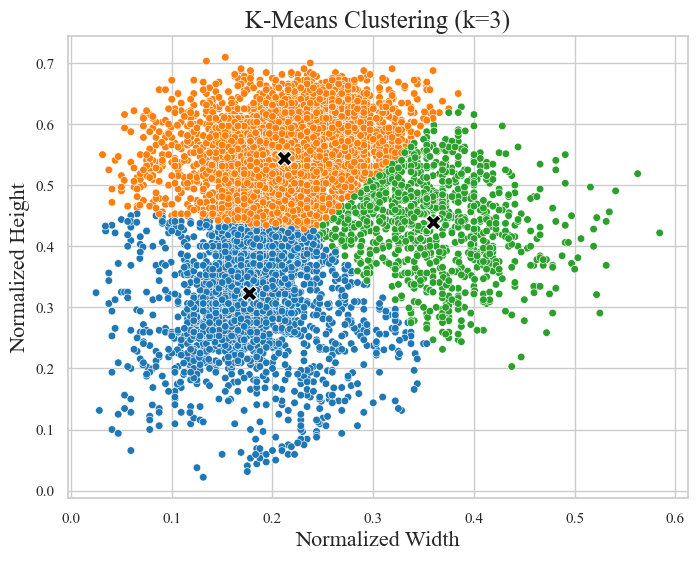


Cluster Centers for k=4:
  Cluster 0: Width=0.1864, Height=0.4674
  Cluster 1: Width=0.2255, Height=0.5771
  Cluster 2: Width=0.1758, Height=0.2906
  Cluster 3: Width=0.3616, Height=0.4374


<Figure size 640x480 with 0 Axes>

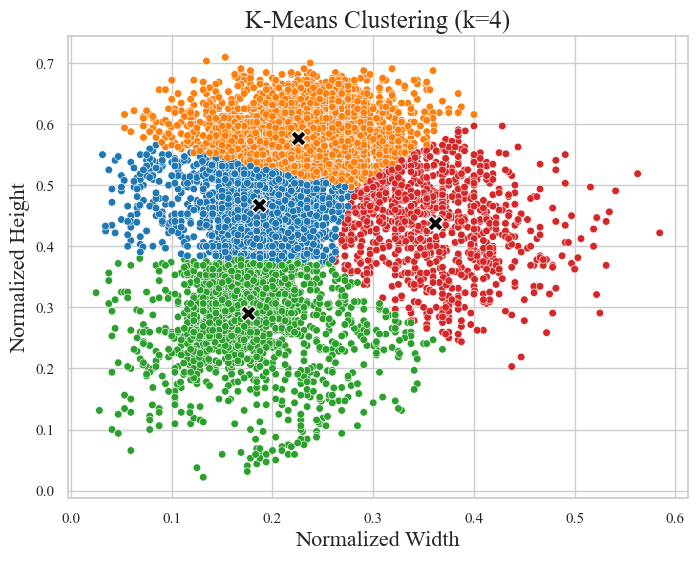


Cluster Centers for k=5:
  Cluster 0: Width=0.1799, Height=0.3839
  Cluster 1: Width=0.2368, Height=0.5894
  Cluster 2: Width=0.1744, Height=0.2520
  Cluster 3: Width=0.3630, Height=0.4346
  Cluster 4: Width=0.1910, Height=0.5064


<Figure size 640x480 with 0 Axes>

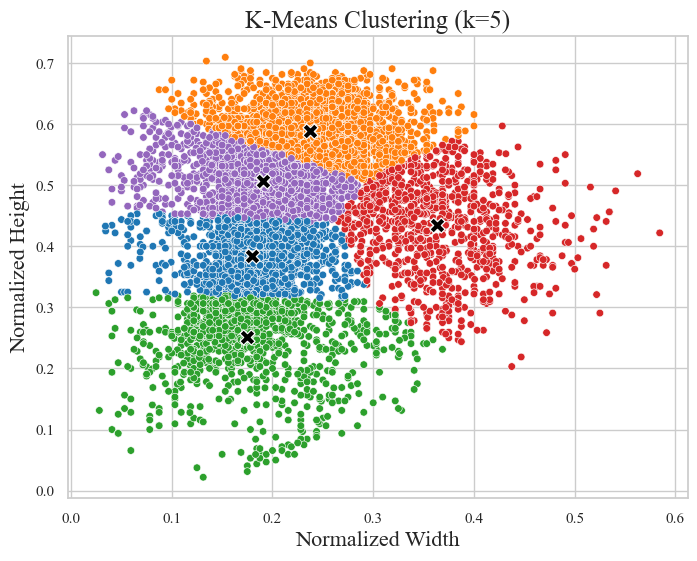


Cluster Centers for k=6:
  Cluster 0: Width=0.1569, Height=0.2817
  Cluster 1: Width=0.2401, Height=0.5952
  Cluster 2: Width=0.2764, Height=0.2143
  Cluster 3: Width=0.3614, Height=0.4506
  Cluster 4: Width=0.1826, Height=0.4080
  Cluster 5: Width=0.1940, Height=0.5192


<Figure size 640x480 with 0 Axes>

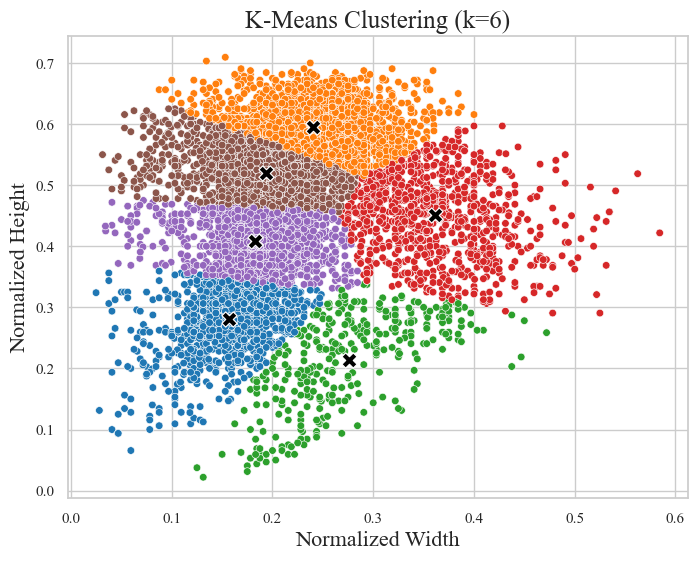


Cluster Centers for k=7:
  Cluster 0: Width=0.1753, Height=0.3360
  Cluster 1: Width=0.2379, Height=0.6043
  Cluster 2: Width=0.3753, Height=0.3573
  Cluster 3: Width=0.3261, Height=0.5106
  Cluster 4: Width=0.1854, Height=0.4473
  Cluster 5: Width=0.1942, Height=0.5355
  Cluster 6: Width=0.1674, Height=0.2197


<Figure size 640x480 with 0 Axes>

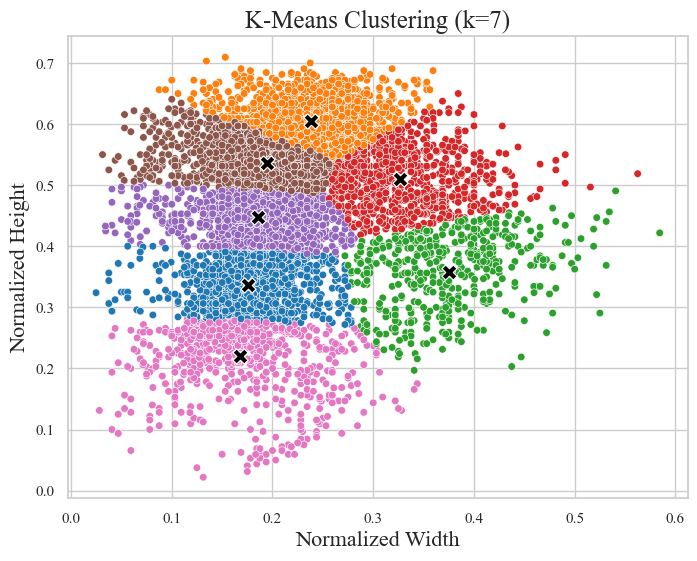


Cluster Centers for k=8:
  Cluster 0: Width=0.1621, Height=0.2869
  Cluster 1: Width=0.3206, Height=0.5131
  Cluster 2: Width=0.3798, Height=0.3677
  Cluster 3: Width=0.1878, Height=0.4811
  Cluster 4: Width=0.1827, Height=0.3854
  Cluster 5: Width=0.2454, Height=0.6103
  Cluster 6: Width=0.1971, Height=0.5538
  Cluster 7: Width=0.1963, Height=0.1703


<Figure size 640x480 with 0 Axes>

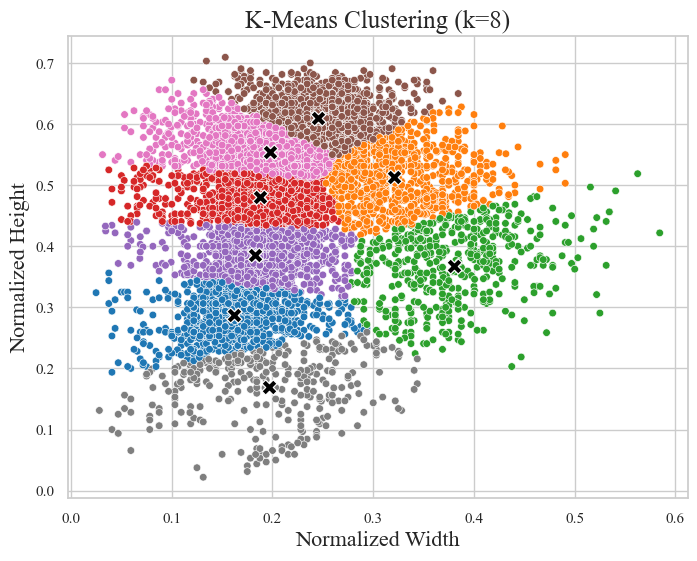


Cluster Centers for k=9:
  Cluster 0: Width=0.1619, Height=0.2883
  Cluster 1: Width=0.2836, Height=0.5488
  Cluster 2: Width=0.3543, Height=0.3207
  Cluster 3: Width=0.1907, Height=0.4832
  Cluster 4: Width=0.1806, Height=0.3875
  Cluster 5: Width=0.2364, Height=0.6169
  Cluster 6: Width=0.1916, Height=0.5560
  Cluster 7: Width=0.1812, Height=0.1652
  Cluster 8: Width=0.3685, Height=0.4618


<Figure size 640x480 with 0 Axes>

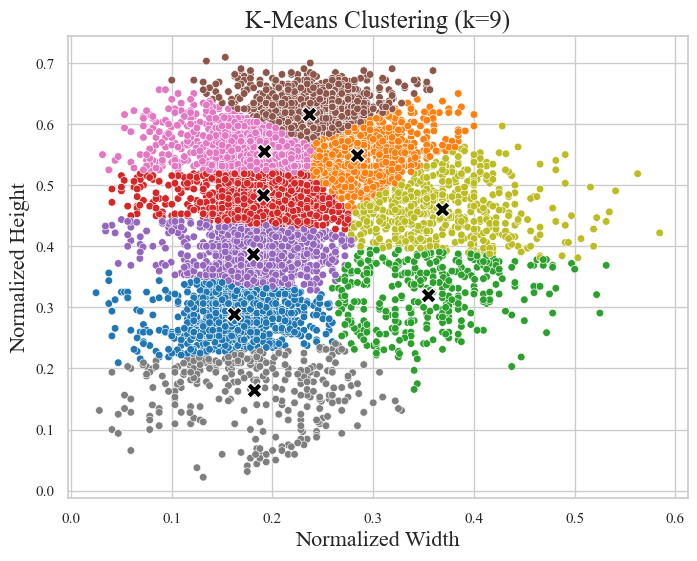


Cluster Centers for k=10:
  Cluster 0: Width=0.1604, Height=0.2865
  Cluster 1: Width=0.2994, Height=0.5677
  Cluster 2: Width=0.3403, Height=0.3082
  Cluster 3: Width=0.1717, Height=0.4755
  Cluster 4: Width=0.1821, Height=0.3830
  Cluster 5: Width=0.2287, Height=0.6140
  Cluster 6: Width=0.1938, Height=0.5508
  Cluster 7: Width=0.1803, Height=0.1624
  Cluster 8: Width=0.3819, Height=0.4508
  Cluster 9: Width=0.2395, Height=0.4926


<Figure size 640x480 with 0 Axes>

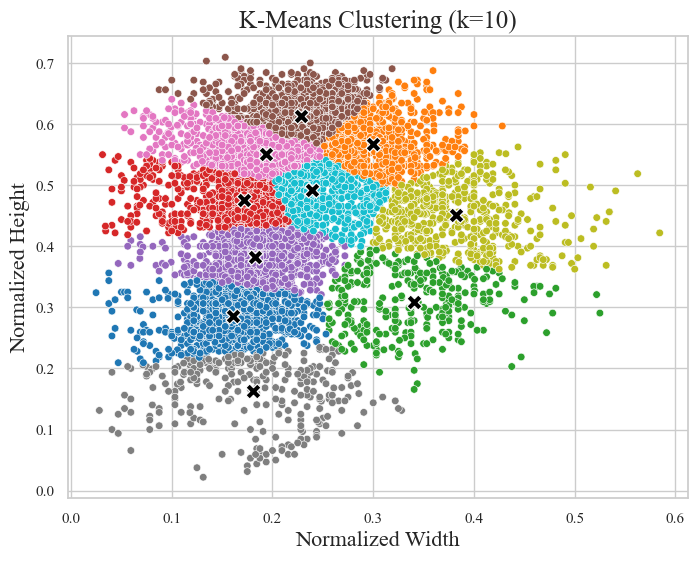

<Figure size 640x480 with 0 Axes>

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Seaborn style and font settings
sns.set(style='whitegrid')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
})

# Directory containing YOLO labels
label_dir = 'data/train'

# Collect normalized width and height
widths = []
heights = []

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        filepath = os.path.join(label_dir, filename)
        with open(filepath, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:  # YOLO format: class x_center y_center width height
                    widths.append(float(parts[3]))
                    heights.append(float(parts[4]))

X = np.column_stack((widths, heights))

# Plot all bounding boxes (scatter plot)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=widths, y=heights, s=30, color='dodgerblue', alpha=0.6, ax=ax)
ax.set_title('All Bounding Boxes (Normalized Width vs Height)')
ax.set_xlabel('Normalized Width')
ax.set_ylabel('Normalized Height')
fig.patch.set_alpha(0.0)
plt.savefig('all_bboxes.png', transparent=True, dpi=300)
plt.show()

# Apply KMeans clustering for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    # Print centroid information
    print(f"\nCluster Centers for k={k}:")
    for idx, (w, h) in enumerate(centers):
        print(f"  Cluster {idx}: Width={w:.4f}, Height={h:.4f}")

    # Create cluster plot
    fig, ax = plt.subplots(figsize=(8, 6))
    palette = sns.color_palette("tab10", k)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=palette, s=30, ax=ax, legend=False)
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], marker='X', color='black', s=120, ax=ax)

    ax.set_title(f'K-Means Clustering (k={k})')
    ax.set_xlabel('Normalized Width')
    ax.set_ylabel('Normalized Height')
    fig.patch.set_alpha(0.0)
    plt.savefig(f'kmeans_k{k}.png', transparent=True, dpi=300)
    plt.show()

    plt.savefig(f"transparent_plot_{k}.png", transparent=True, dpi=300)

# from google.colab import files
# files.download("transparent_plot.png")



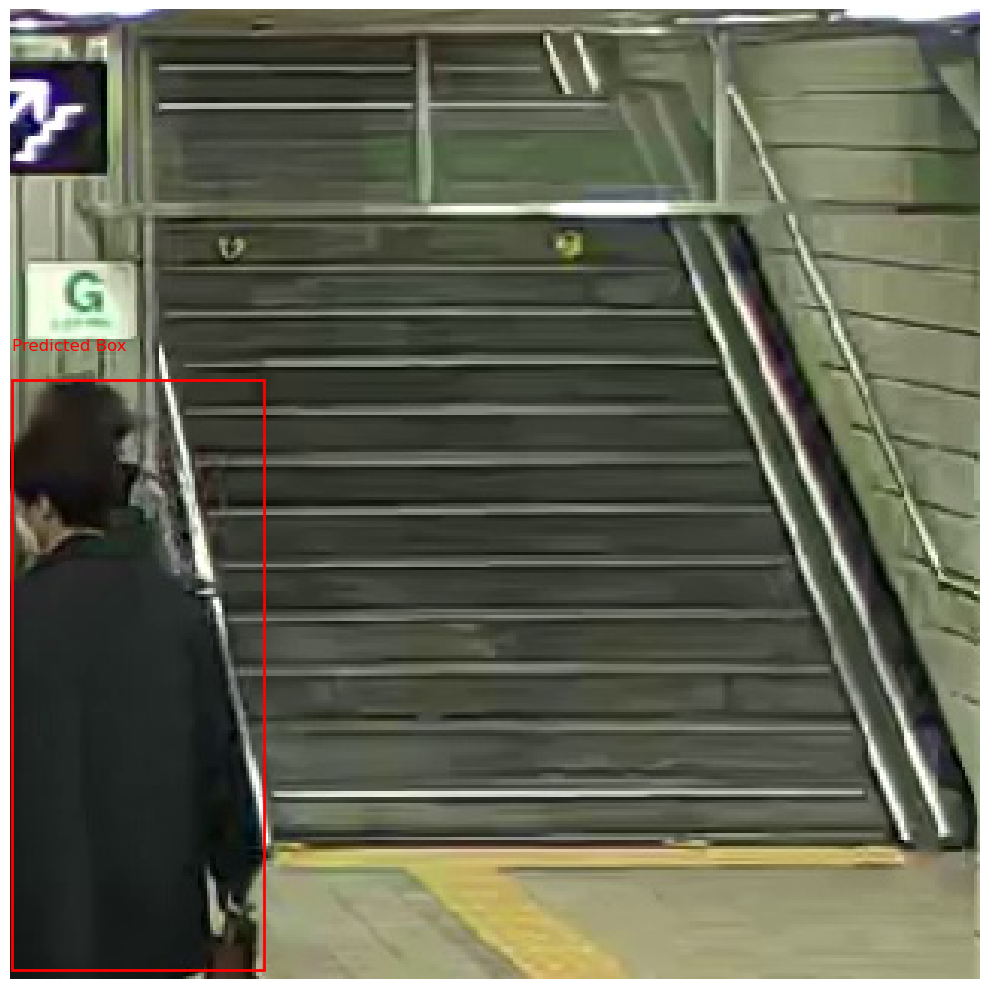

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Image path
image_path = '/home/hj/Desktop/Dad/github/DUP/data/test/4_058020.jpg'

# Bounding box in COCO format: [x, y, width, height]
bbox = [0.023426055908203125, 122.0132064819336, 83.36765670776367, 194.3981704711914]

# Load and convert image from BGR (OpenCV) to RGB (Matplotlib)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create plot
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# Draw bounding box in red
x, y, w, h = bbox
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Optional: label the box
ax.text(x, y - 10, 'Predicted Box', color='red', fontsize=12)

# Show plot
plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
import json
import os
import cv2

# Paths
gt_path = '/home/hj/Desktop/Dad/github/DUP/data/coco_test.json'
pred_path = '/home/hj/Desktop/Dad/github/DUP/mmdetection/work_dirs/coco_detection/test_fasterrcnn.bbox.json'
img_dir = '/home/hj/Desktop/Dad/github/DUP/data/test'
output_dir = '/home/hj/Desktop/Dad/github/DUP/yolo_predictions'

# Create output directory if needed
os.makedirs(output_dir, exist_ok=True)

# Load ground truth and predictions
with open(gt_path, 'r') as f:
    coco_gt = json.load(f)

with open(pred_path, 'r') as f:
    predictions = json.load(f)

# Create mapping from image_id to file_name and image size
id_to_filename = {}
id_to_size = {}

for img in coco_gt['images']:
    img_path = os.path.join(img_dir, img['file_name'])
    if os.path.exists(img_path):
        image = cv2.imread(img_path)
        height, width = image.shape[:2]
        id_to_filename[img['id']] = img['file_name']
        id_to_size[img['id']] = (width, height)
    else:
        print(f"Warning: Image file not found: {img_path}")

# Collect predictions per image
pred_per_image = {}
for pred in predictions:
    img_id = pred['image_id']
    if img_id not in id_to_filename:
        continue
    filename = id_to_filename[img_id]
    width, height = id_to_size[img_id]
    x_min, y_min, box_w, box_h = pred['bbox']
    x_center = x_min + box_w / 2
    y_center = y_min + box_h / 2
    # Normalize
    x_center /= width
    y_center /= height
    box_w /= width
    box_h /= height
    # YOLO requires class IDs starting at 0 (adjust if needed)
    class_id = pred['category_id'] - 1

    yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {box_w:.6f} {box_h:.6f}"

    base_name = os.path.splitext(filename)[0]
    out_path = os.path.join(output_dir, base_name + '.txt')

    # Append to corresponding file
    with open(out_path, 'a') as out_file:
        out_file.write(yolo_line + '\n')
